# Redução de Dimensionalidade
##### Transformar uma imagem colorida para níveis de cinza (0 a 255) e depois a binarização da imagem (0 e 255) convertendo para preto e branco.

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

### Imagem original colorida

In [2]:
img1 = img.imread('lena_color_256.tif')
img1.shape #imagem colorida tres canair rgb

(256, 256, 3)

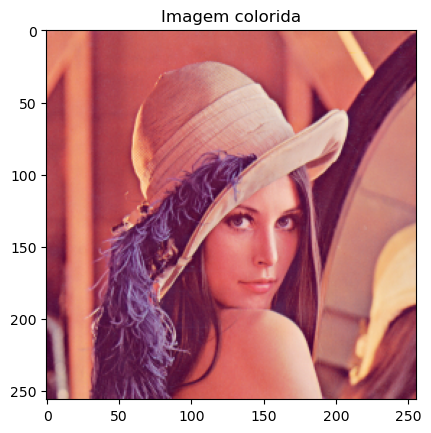

In [3]:
plt.imshow(img1, cmap='gray')
plt.title('Imagem colorida')
plt.show()

### Imagem em níveis de cinza (0 a 255)

In [4]:
# Função que converte uma imagem colorida para tons de zinza

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    
    #gray = 0.2125 * r + 0.7154 * g + 0.0721 * b    
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    
    gray[gray > 255] = 255

    return gray

In [5]:
# Função para equalizar a imagens fixando o maior pixel em 255 e o menor em 0
def eqHistograma(img):
    lin, col = img.shape

    nova_img = np.zeros((lin, col))
    
    Tmin = np.min(img)
    Tmax = np.max(img)

    for j in range(0, lin):
        for k in range(0, col):
            nova_img[j, k] = np.ceil(255*((img[j, k] - Tmin)/(Tmax - Tmin)))
            
    nova_img = np.uint8(nova_img)
    
    return nova_img

In [6]:
img2 = rgb2gray(img1) #converter a imagens em tons de cinza
img2.shape #imagem com um canal

(256, 256)

In [7]:
img2.min(), img2.max()

(26.8186, 237.65919999999997)

In [8]:
img2 = eqHistograma(img2) #para equalizar a imagem
img2.min(), img2.max() #menor e maior valor de pixel

(0, 255)

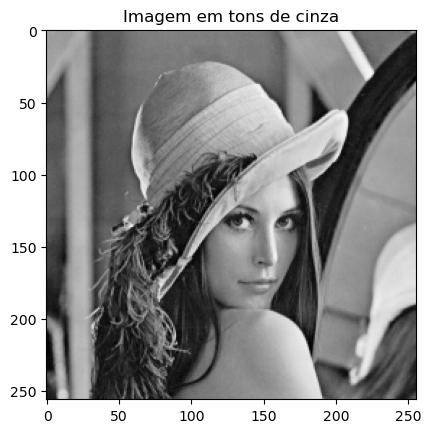

In [9]:
plt.imshow(img2, cmap='gray')
plt.title('Imagem em tons de cinza')
plt.show()

### Imagem preto e branco (0 e 255)

In [10]:
#Limiarizar uma imagem, onde cada pixel com valor menor que o limiar são fixados em 0 e maior que limiar fixado em 255
def limiarizacao(img, limiar):

    img_saida = np.zeros(img.shape)

    Tmin = np.min(img)
    Tmax = np.max(img)
    
    altura, largura = img_saida.shape    

    for y in range(0, altura):
        for x in range(0, largura):
            if img[y][x] < limiar:
                img_saida[y, x] = Tmin
            else:
                img_saida[y, x] = Tmax

    img_saida = np.uint8(img_saida)

    return img_saida

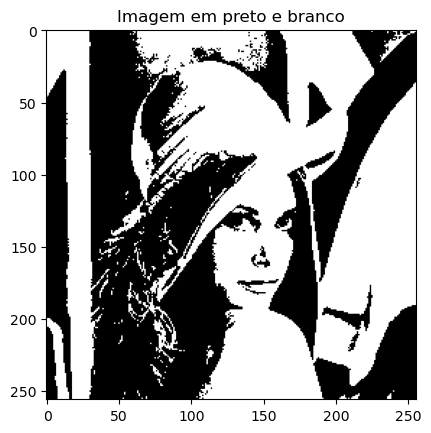

In [11]:
img3 = limiarizacao(img2, 120)
plt.imshow(img3, cmap='gray')
plt.title('Imagem em preto e branco')
plt.show()

In [12]:
img3

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)